<a href="https://colab.research.google.com/github/rahiakela/deep-learning-research-and-practice/blob/main/deep-learning-with-pytorch-step-by-step/01_visualizing_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Visualizing Gradient Descent

If you really understand how gradient descent works, you will also understand how
the characteristics of your data and your choice of hyper-parameters (mini-batch
size and learning rate, for instance) have an impact on how well and how fast the
model training is going to be.

I mean visualizing the effects of different
settings, I mean telling a story to illustrate the concept. That’s how you develop
intuition.

That being said, I’ll cover the five basic steps you’d need to go through to use
gradient descent. I’ll show you the corresponding Numpy code while explaining lots
of fundamental concepts along the way.

##Setup

In [1]:
try:
    import google.colab
    import requests
    url = 'https://raw.githubusercontent.com/dvgodoy/PyTorchStepByStep/master/config.py'
    r = requests.get(url, allow_redirects=True)
    open('config.py', 'wb').write(r.content)    
except ModuleNotFoundError:
    pass

from config import *
config_chapter0()
# This is needed to render the plots in this chapter
from plots.chapter0 import *

Finished!


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [3]:
import warnings

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", category=np.VisibleDeprecationWarning)

##Model

The model must be simple and familiar, so you can focus on the inner workings of gradient descent.

So, I will stick with a model as simple as it can be: a linear regression with a single
feature x!

$$
\Large y = b + w x + \epsilon
$$

##Data Generation

In order to generate synthetic data for it, we need to
pick values for its `parameters`. I chose `b = 1` and `w = 2`.

First, let’s generate our `feature (x)`: we use Numpy's `rand` method to randomly
generate `100 (N)` points between 0 and 1.

Then, we plug our `feature(x)` and our parameters b and w into our equation to
compute our `labels(y)`. But we need to add some Gaussian noise (epsilon) as well;otherwise, our synthetic dataset would be a perfectly straight line.



In [4]:
np.random.seed(42)

true_b = 1
true_w = 2
N = 100

# Data Generation
x = np.random.rand(N, 1)
print(f"X shape: {x.shape}")
epsilon = (.1 * np.random.randn(N, 1))

# estimate y
y = true_b + true_w * x + epsilon

X shape: (100, 1)


Let's split data into train and validation set.

In [5]:
# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[: int(.8 * N)]
# Uses the remaining indices for validation
val_idx = idx[int(.8 * N): ]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

print(x_train.shape, x_val.shape)

(80, 1) (20, 1)


(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf8bff6f90>,
       dtype=object))

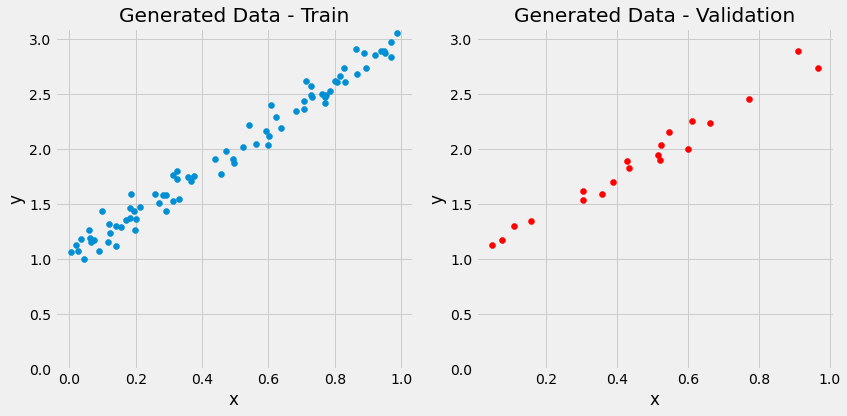

In [6]:
# let's plot the training and validation set
figure1(x_train, y_train, x_val, y_val)

We know that b = 1, w = 2, but now let’s see how close we can get to the true
values by using gradient descent and the 80 points in the training set (for training,
N = 80).

##Step 0: Random Initialization

In our example, we already know the true values of the parameters, but this will
obviously never happen in real life: if we knew the true values, why even bother to
train a model to find them?!

OK, given that we’ll never know the true values of the parameters, we need to set
initial values for them. 

How do we choose them? 

It turns out; a random guess is as
good as any other.

For training a model, you need to randomly initialize the parameters/weights.

In [7]:
# Step 0 - Initializes parameters "b" and "w" randomly
np.random.seed(42)

b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

[0.49671415] [-0.1382643]


##Step 1: Compute Model’s Predictions

This is the forward pass - it simply computes the model’s predictions using the current
values of the parameters/weights. 

At the very beginning, we will be producing really
bad predictions.

In [8]:
# Step 1 - Computes our model's predicted output - forward pass
y_hat = b + w * x_train

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbf778bb190>)

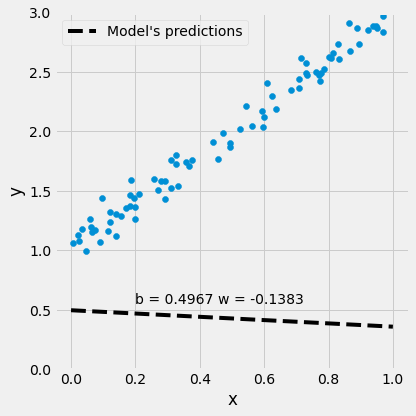

In [9]:
figure2(x_train, y_train, b, w)

##Step 2: Compute the Loss

There is a subtle but fundamental difference between error and loss.

The error is the difference between the actual value (label) and the predicted
value computed for a single data point.

So, for a given `i-th` point (from our dataset
of `N` points), its error is:

$$error_i = \hat y_i - y_i$$

The error of the first point in our dataset (`i = 0`) can be represented like this:

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbf77422310>)

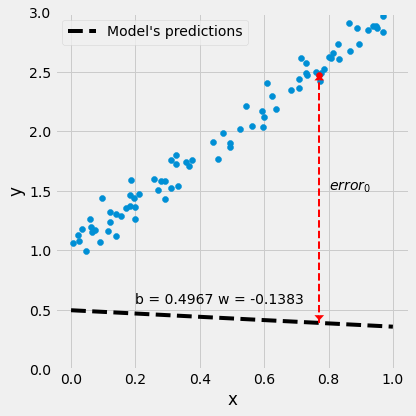

In [10]:
figure3(x_train, y_train, b, w)

The loss, on the other hand, is some sort of aggregation of errors for a set of data
points.

It seems rather obvious to compute the loss for all (N) data points, right?

Although it will surely yield a more stable path from the initial random
parameters to the parameters that minimize the loss, it will also surely be slow.

For a regression problem, the loss is given by the Mean Squared Error (MSE), that
is, the average of all squared errors, that is, the average of all squared differences
between labels (`y`) and predictions (`b + wx`).

$$
\Large
\begin{aligned}
\text{MSE} &= \frac{1}{n} \sum_{i=1}^n{\text{error}_i}^2
\\
&= \frac{1}{n} \sum_{i=1}^n{(\hat{y_i} - y_i)}^2
\\
&= \frac{1}{n} \sum_{i=1}^n{(b + w x_i - y_i)}^2
\end{aligned}
$$

Here, we are using all data points of the training set to compute the
loss, so `n = N = 80`, meaning we are indeed performing batch gradient descent.

In [11]:
# Step 2 - Computing the loss

# We are using ALL data points, so this is BATCH gradient descent. How wrong is our model? That's the error!
error = (y_hat - y_train)

# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()
print(loss)

2.7421577700550976


###Loss surface

We have just computed the loss (`2.74`) corresponding to our randomly initialized
parameters (`b = 0.49` and `w = -0.13`). 

What if we did the same for ALL possible
values of `b` and `w`? 

Well, not all possible values, but all combinations of evenly spaced
values in a given range, like:

In [12]:
# Reminder:
true_b = 1
true_w = 2

# we have to split the ranges in 100 evenly spaced intervals each
b_range = np.linspace(true_b - 3, true_b + 3, 101)
w_range = np.linspace(true_w - 3, true_w + 3, 101)

# meshgrid is a handy function that generates a grid of b and w values for all combinations
bs, ws = np.meshgrid(b_range, w_range)
bs.shape, ws.shape

((101, 101), (101, 101))

In [13]:
# How does one of these matrices look like?
bs

array([[-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       ...,
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ]])

Next, we could use those values to compute the corresponding predictions, errors,
and losses. 

Let’s start taking a single data point from the training set and
computing the predictions for every combination in our grid:

In [14]:
sample_x = x_train[0]
sample_y_hat = bs + ws * sample_x
sample_y_hat.shape, sample_x.shape

((101, 101), (1,))

In [15]:
sample_x

array([0.77127035])

Thanks to its broadcasting capabilities, Numpy is able to understand we want to
multiply the same x value by every entry in the ws matrix. 

This operation resulted
in a grid of predictions for that single data point. 

Now we need to do this for every
one of our 80 data points in the training set.

In [16]:
all_predictions = np.apply_along_axis(
  func1d=lambda x: bs + ws * x,
  axis=1,
  arr=x_train
)

all_predictions.shape

(80, 101, 101)

The errors are the difference between the predictions and labels.

Let's prepare labels for making this difference.

In [17]:
y_train.shape

(80, 1)

In [18]:
all_labels = y_train.reshape(-1, 1, 1)
all_labels.shape

(80, 1, 1)

In [19]:
all_errors = (all_predictions - all_labels)
all_errors.shape

(80, 101, 101)

Each prediction has its own error, so we got 80 matrices of shape (101, 101), again,
one matrix for each data point, each matrix containing a grid of errors.

The only step missing is to compute the mean squared error. 

First, we take the
square of all errors. Then we average the squares over all data points.

In [20]:
all_losses = (all_errors ** 2).mean(axis=0)
all_losses.shape

(101, 101)

The result is a grid of losses, each loss corresponding
to a different combination of the parameters `b` and `w`.

These losses are our loss surface, which can be visualized in a 3D plot, where the
vertical `axis (z)` represents the loss values.

(<Figure size 864x432 with 2 Axes>,
 (<matplotlib.axes._subplots.Axes3DSubplot at 0x7fbf772b3150>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fbf770cb890>))

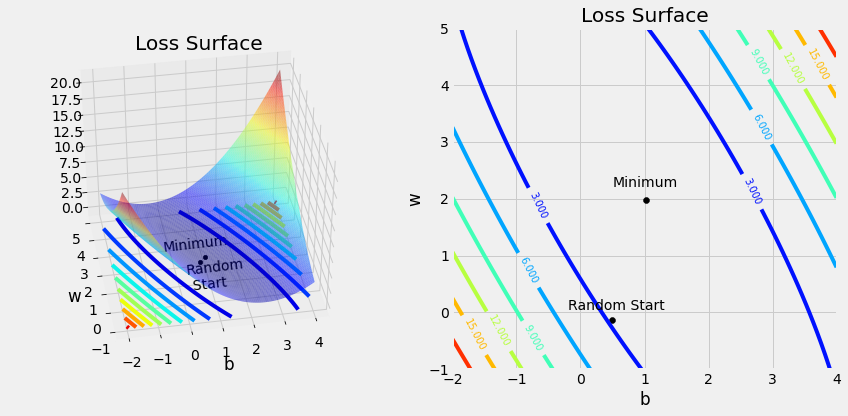

In [21]:
figure4(x_train, y_train, b, w, bs, ws, all_losses)

In the center of the plot, where parameters `(b, w)` have values close to `(1, 2)`, the loss is at its minimum value. This is the point we’re trying to reach using gradient descent.

In the bottom, slightly to the left, there is the random start point, corresponding to
our randomly initialized parameters.

###Cross-Sections

We can cut a cross-section in the loss surface to check
what the loss looks like if the other parameter were held constant.

Let’s start by making `b =0.52` (the value from b_range that is closest to our initial
random value for `b, 0.4967`) - we cut a cross-section vertically.

(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf76a60b90>,
       dtype=object))

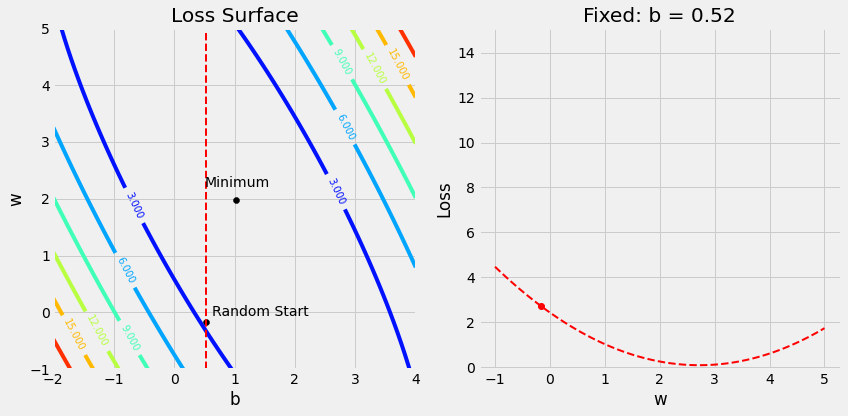

In [22]:
figure5(x_train, y_train, b, w, bs, ws, all_losses)

What does this cross-section tell us? 

It tells us that, if we keep b constant (at 0.52),
the loss, seen from the perspective of parameter w, can be minimized if w gets
increased (up to some value between 2 and 3).

OK, so far, so good… what about the other cross-section? 

Let’s cut it horizontally
now, making `w = -0.16` (the value from w_range that is closest to our initial random
value for b, `-0.1382`).

(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf76adc450>,
       dtype=object))

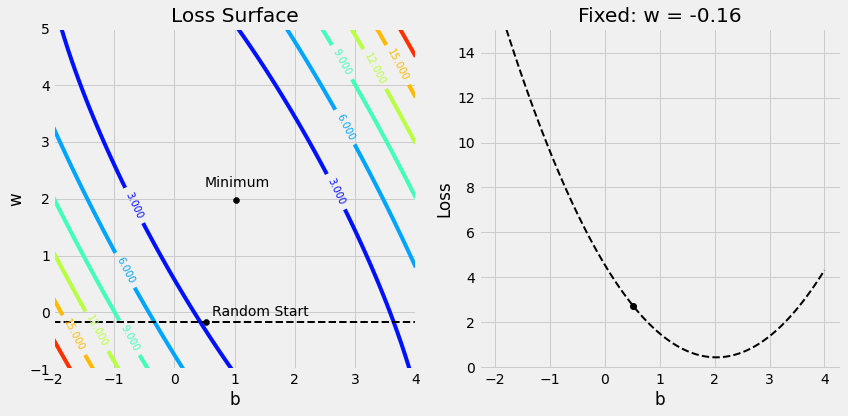

In [23]:
figure6(x_train, y_train, b, w, bs, ws, all_losses)

Now, if we keep w constant (at `-0.16`), the loss, seen from the perspective of parameter `b`, can be minimized if `b` gets increased (up to some value close to 2).

##Step 3: Compute the Gradients

A gradient is a partial derivative — why partial? 

Because one computes it with respect to (w.r.t.) a single parameter. We have two parameters, `b` and `w`, so we must compute two partial derivatives.

A derivative tells you how much a given quantity changes when you slightly vary some other quantity. 

In our case, how much does our MSE loss change when we
vary each one of our two parameters separately?

>**Gradient** = how much the loss changes if ONE parameter
changes a little bit!

$$
\Large
\begin{aligned}
\frac{\partial{\text{MSE}}}{\partial{b}} = \frac{\partial{\text{MSE}}}{\partial{\hat{y_i}}} \frac{\partial{\hat{y_i}}}{\partial{b}} &= \frac{1}{n} \sum_{i=1}^n{2(b + w x_i - y_i)} 
\\
&= 2 \frac{1}{n} \sum_{i=1}^n{(\hat{y_i} - y_i)}
\\
\frac{\partial{\text{MSE}}}{\partial{w}} = \frac{\partial{\text{MSE}}}{\partial{\hat{y_i}}} \frac{\partial{\hat{y_i}}}{\partial{w}} &= \frac{1}{n} \sum_{i=1}^n{2(b + w x_i - y_i) x_i} 
\\
&= 2 \frac{1}{n} \sum_{i=1}^n{x_i (\hat{y_i} - y_i)}
\end{aligned}
$$

Just to be clear: we will always use our "regular" error computed at the beginning
of Step 2.

In [24]:
# Step 3 - Computes gradients for both "b" and "w" parameters
b_grad = 2 * error.mean()
w_grad = 2 * (x_train * error).mean()

print(b_grad, w_grad)

-3.044811379650508 -1.8337537171510832


###Visualizing Gradients

Since the gradient for `b` is bigger (in absolute value, `3.04`) than the gradient for `w` (in absolute value, `1.83`), the answer for the question I posed you in the "Cross-Sections" section is: the black curve (`b` changes, `w` is constant) yields the biggest changes in loss.

To answer that, let’s first put both cross-section plots side-by-side, so we can more easily compare them: what is the main difference between them?

(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf77213f90>,
       dtype=object))

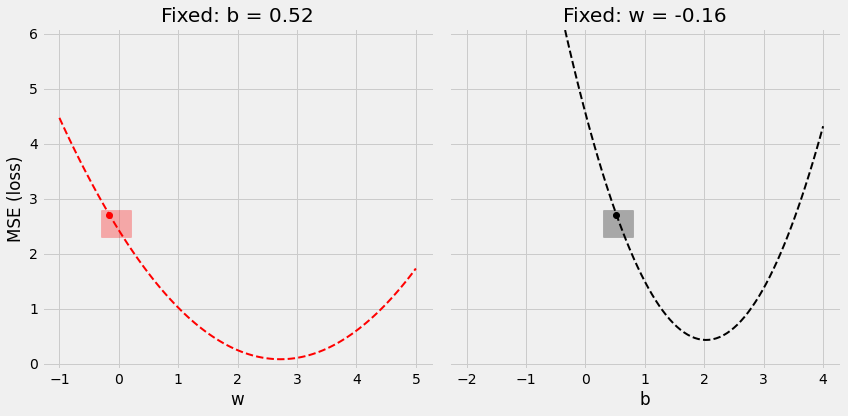

In [25]:
figure7(b, w, bs, ws, all_losses)

The curve on the right is steeper. That’s your answer! Steeper curves have bigger gradients.

We already know that to minimize the loss, both
`b` and `w` needed to be increased. 

So, keeping the spirit of using gradients, let’s
increase each parameter a little bit (always keeping the other one fixed!).

By the
way, in this example, a little bit equals 0.12.

What effect do these increases have on the loss? Let’s check it out:

(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf76bd1f10>,
       dtype=object))

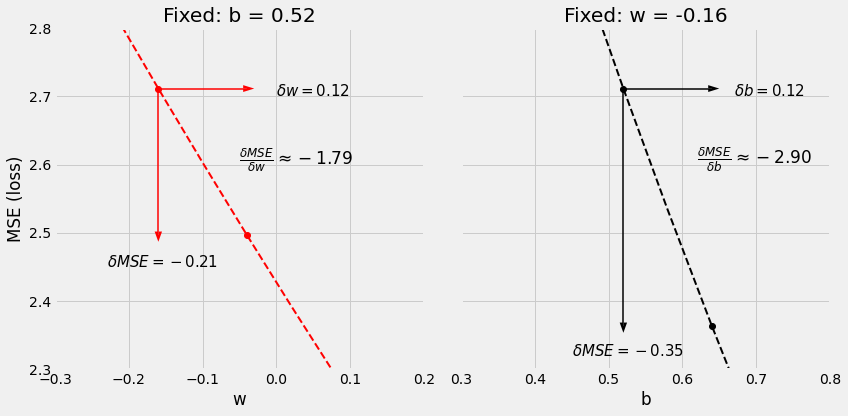

In [26]:
figure8(b, w, bs, ws, all_losses)

On the left plot, increasing `w` by `0.12` yields a loss reduction of `0.21`.

The same reasoning goes for the plot on the right: increasing `b` by the same `0.12` yields a bigger loss reduction of `0.35`.

##Step 4: Update the Parameters

In the final step, we use the gradients to update the parameters. 

Since we are
trying to minimize our losses, we reverse the sign of the gradient for the update.

$$
\Large
\begin{aligned}
b &= b - \eta \frac{\partial{\text{MSE}}}{\partial{b}}
\\
w &= w - \eta \frac{\partial{\text{MSE}}}{\partial{w}}
\end{aligned}
$$

In our example, let’s start with a value of 0.1 for the learning rate.

In [27]:
# Sets learning rate
lr = 0.1
print(b, w)

# Step 4 - Updates parameters using gradients and the learning rate
b = b - lr * b_grad
w = w - lr * w_grad

print(b, w)

[0.49671415] [-0.1382643]
[0.80119529] [0.04511107]


What’s the impact of one update on our model? Let’s visually check its predictions.

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbf76c95250>)

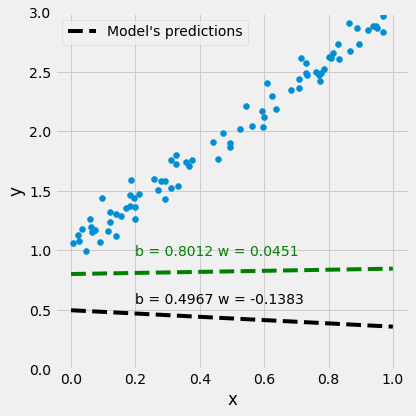

In [28]:
figure9(x_train, y_train, b, w)

It looks better… at least it started pointing in the right direction :-)

###Low Learning Rate

In [29]:
manual_grad_b = -2.90
manual_grad_w = -1.79

np.random.seed(42)
b_initial = np.random.randn(1)
w_initial = np.random.randn(1)

(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf76bf1050>,
       dtype=object))

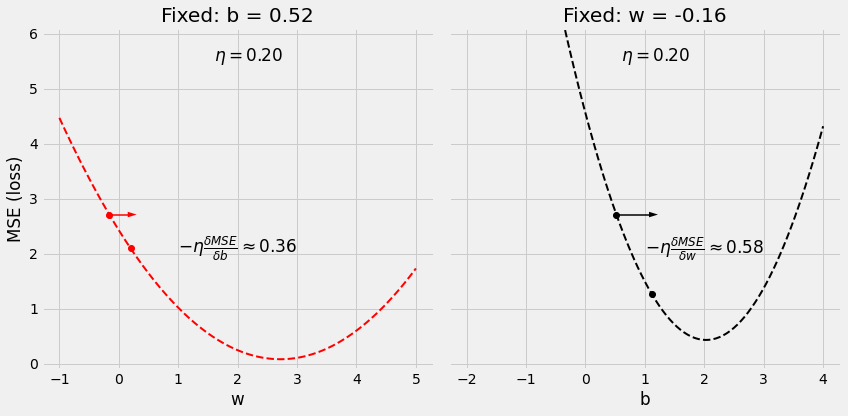

In [30]:
lr = .2

figure10(b_initial, w_initial, bs, ws, all_losses, manual_grad_b, manual_grad_w, lr)

### High Learning Rate

(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf746f3790>,
       dtype=object))

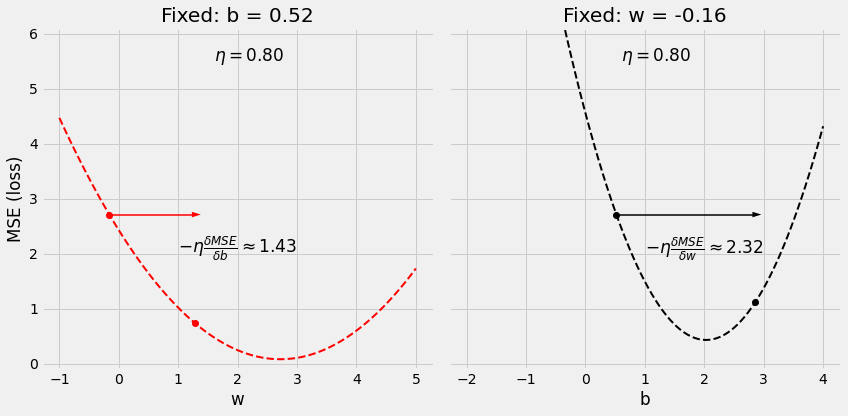

In [31]:
lr = .8

figure10(b_initial, w_initial, bs, ws, all_losses, manual_grad_b, manual_grad_w, lr)

###Very High Learning Rate

(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf79b40b50>,
       dtype=object))

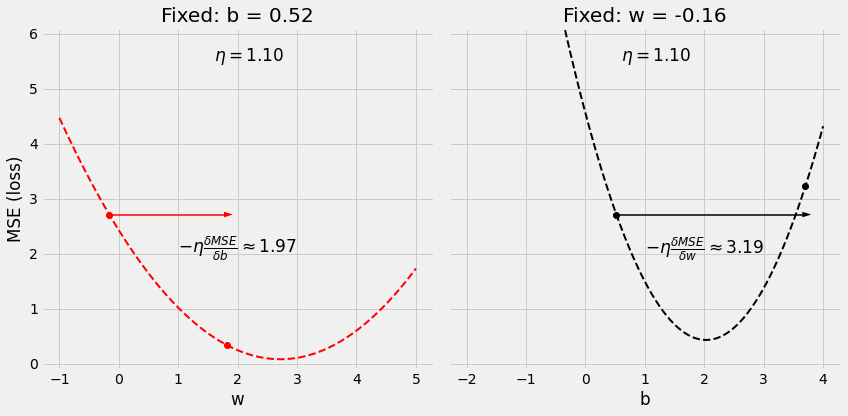

In [32]:
lr = 1.1

figure10(b_initial, w_initial, bs, ws, all_losses, manual_grad_b, manual_grad_w, lr)

###**Bad** Feature

How do we achieve equally steep curves? I’m on it! 

First, let’s take a look at a slightly
modified example, which I am calling the "bad" dataset:

* I multiplied our feature (x) by 10, so it is in the range `[0, 10]` now, and renamed it `bad_x`
* but since I do not want the labels (y) to change, I divided the original `true_w` parameter by 10 and renamed it `bad_w` - this way, both `bad_w * bad_x` and `w * x` yield the same results



In [33]:
true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)

# We divide w by 10
bad_w = true_w / 10
# And multiply x by 10
bad_x = np.random.rand(N, 1) * 10

# So, the net effect on y is zero - it is still the same as before
y = true_b + bad_w * bad_x + (.1 * np.random.rand(N, 1))

Then I performed the same split as before for both, original and bad, datasets and
plot the training sets side by side.

In [34]:
# Generates train and validation sets

# It uses the same train_idx and val_idx as before, but it applies to bad_x
bad_x_train, y_train = bad_x[train_idx], y[train_idx]
bad_x_val, y_val = bad_x[val_idx], y[val_idx]

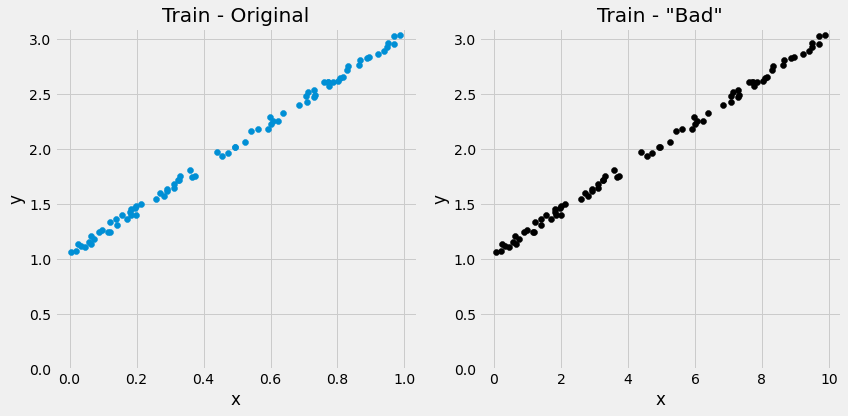

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(x_train, y_train)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_ylim([0, 3.1])
ax[0].set_title('Train - Original')

ax[1].scatter(bad_x_train, y_train, c='k')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_ylim([0, 3.1])
ax[1].set_title('Train - "Bad"')
fig.tight_layout()

The only difference between the two plots is the scale of feature `x`. Its range was
`[0, 1]`, now it is `[0, 10]`. The label `y` hasn’t changed, and I did not touch `true_b`.

Does this simple scaling have any meaningful impact on our gradient descent?

Well, if it hadn’t, I wouldn’t be asking it, right? 

Let’s compute a new loss surface and
compare to the one we had before:

In [36]:
# The ranges CHANGED because we are centering at the new minimum, using "bad" data
bad_b_range = np.linspace(-2, 4, 101)
bad_w_range = np.linspace(-2.8, 3.2, 101)

bad_bs, bad_ws = np.meshgrid(bad_b_range, bad_w_range)

(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf74534fd0>,
       dtype=object))

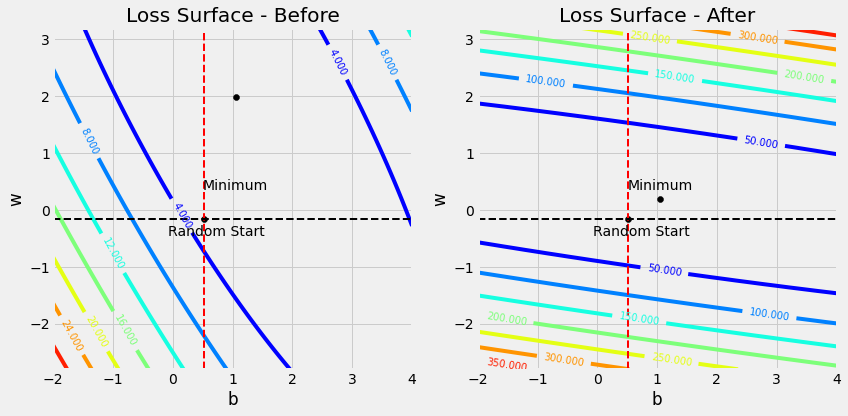

In [37]:
figure14(x_train, y_train, b_initial, w_initial, bad_bs, bad_ws, bad_x_train)

Look at the contour values: the dark blue line was 3.0, and now it is
50.0! For the same range of parameter values, loss values are much bigger.

Let’s look at the cross-sections before and after we multiplied feature `x` by 10:

(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf74409b90>,
       dtype=object))

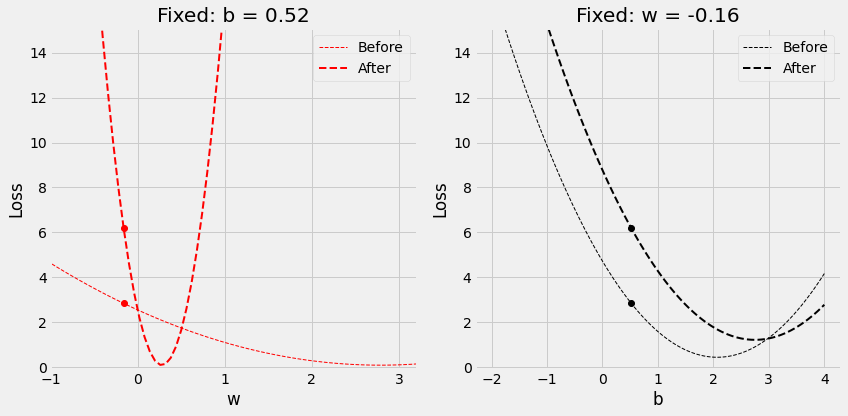

In [38]:
figure15(x_train, y_train, b_initial, w_initial, bad_bs, bad_ws, bad_x_train)

What happened here? 

The red curve got much steeper (bigger gradient), and thus
we must use a smaller learning rate to safely descend along it.

How can we fix it? Well, we ruined it by scaling it `10x` bigger… perhaps we can make it better if we scale it in a different way.

###Feature Normalizing

StandardScaler transforms a feature in such a way that it ends up with zero mean and unit standard deviation.

How does it achieve that? 

First, it computes the mean and the standard deviation of
a given feature (x) using the training set (N points):

$$
\Large
\overline{X} = \frac{1}{N}\sum_{i=1}^N{x_i}
\\
\Large
\sigma(X) = \sqrt{\frac{1}{N}\sum_{i=1}^N{(x_i - \overline{X})^2}}
\\
\Large
$$

Then it uses both values to scale the feature:

$$
\text{scaled } x_i=\frac{x_i-\overline{X}}{\sigma(X)}
$$

If we were to recompute the mean and the standard deviation of the scaled
feature, we would get 0 and 1, respectively. 

This preprocessing step is commonly
referred to as normalization, although, technically, it should always be referred to as
standardization.



In [39]:
scaler = StandardScaler(with_mean=True, with_std=True)
# We use the TRAIN set ONLY to fit the scaler
scaler.fit(x_train)

# Now we can use the already fit scaler to TRANSFORM both TRAIN and VALIDATION sets
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_val = scaler.fit_transform(x_val)

Let’s plot the three of them, original, "bad" and scaled, side-by-side to illustrate the
differences.

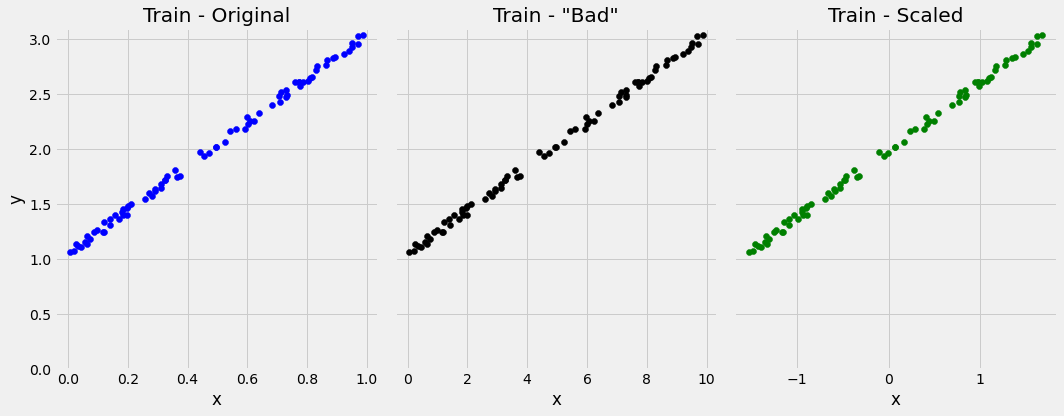

In [40]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
ax[0].scatter(x_train, y_train, c='b')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_ylim([0, 3.1])
ax[0].set_title('Train - Original')

ax[1].scatter(bad_x_train, y_train, c='k')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_ylim([0, 3.1])
ax[1].set_title('Train - "Bad"')

ax[1].label_outer()
ax[2].scatter(scaled_x_train, y_train, c='g')
ax[2].set_xlabel('x')
ax[2].set_ylabel('y')
ax[2].set_ylim([0, 3.1])
ax[2].set_title('Train - Scaled')
ax[2].label_outer()

fig.tight_layout()

Once again, the only difference between the plots is the scale of feature x. Its range was originally `[0, 1]`, then we made it into `[0, 10]`, and now the
StandardScaler made it into `[-1.5, 1.5]`.

OK, time to check the loss surface: to illustrate the differences, I am plotting the
three of them side-by-side: original, "bad" and scaled.

In [41]:
# The ranges CHANGED AGAIN because we are centering at the new minimum, using "scaled" data
scaled_b_range = np.linspace(-1, 5, 101)
scaled_w_range = np.linspace(-2.4, 3.6, 101)
scaled_bs, scaled_ws = np.meshgrid(scaled_b_range, scaled_w_range)

(<Figure size 1080x432 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf7364dc50>,
       dtype=object))

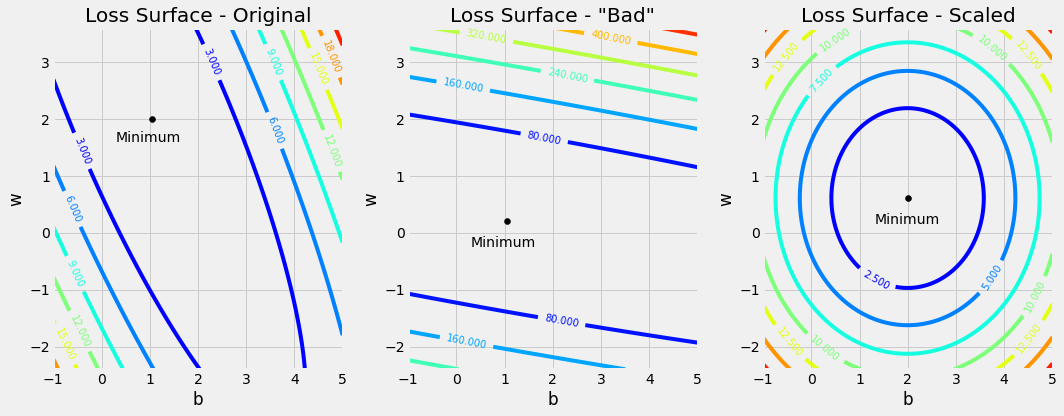

In [42]:
figure17(x_train, y_train, scaled_bs, scaled_ws, bad_x_train, scaled_x_train)

In practice, this is the best surface one could hope for: the cross-sections are going to be similarly steep, and a good learning rate for one of them is also good for the
other.

Sure, in the real world, you’ll never get a pretty bowl like that. But our conclusion still holds:

> 1. Always standardize (scale) your features.
> 2. DO NOT EVER FORGET #1 :-)

## Step 5: Rinse and Repeat!

An epoch is complete whenever every point in the training set
(`N`) has already been used in all steps: 

1. forward pass 
2. computing loss 
3. computing gradients
4. updating parameters

During one epoch, we perform at least one update, but no more
than `N` updates.

The number of updates ($\frac{N}{n}$) will depend on the type of gradient
descent being used:

* for batch (`n = N`) gradient descent, this is trivial, as it uses all
points for computing the loss — one epoch is the same as one
update
* for stochastic (`n = 1`) gradient descent, one epoch means `N`
updates, since every individual data point is used to perform
an update
* for mini-batch (of size `n`), one epoch has $\frac{N}{n}$ updates, since a
mini-batch of `n` data points is used to perform an update

Repeating this process over and over for many epochs is, in a nutshell, training a model.

What happens if we run it over 1,000 epochs?



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbf7342cd10>)

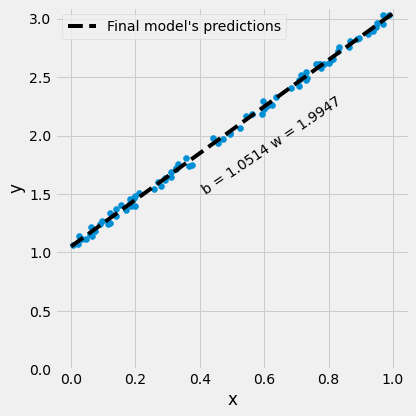

In [43]:
figure18(x_train, y_train)

No particular reason, but this is a fairly simple model, and we can afford to run it
over a large number of epochs.

###The Path of Gradient Descent

Depending on whether we use batch, mini-batch, or stochastic gradient descent,
the path is going to be more or less smooth, and it is likely to reach the minimum in
more or less time.

To illustrate the differences, I’ve generated paths over 100 epochs using either 80
data points (batch), 16 data points (mini-batch) or a single data point (stochastic) for
computing the loss.

![](https://github.com/rahiakela/deep-learning-research-and-practice/blob/main/deep-learning-with-pytorch-step-by-step/images/paths.png?raw=1)

You can see that the resulting parameters at the end of Epoch 1 differ greatly from
one another. This is a direct consequence of the number of updates happening
during one epoch, according to the batch size. 

In our example, for 100 epochs:

* 80 data points (batch): 1 update / epoch, totaling 100 updates
* 16 data points (mini-batch): 5 updates / epoch, totaling 500 updates
* 1 data point (stochastic): 80 updates / epoch, totaling 8.000 updates

So, for both center and right plots, the path between random start and Epoch 1
contains multiple updates which are not depicted in the plot (otherwise it would be
very cluttered) - that’s why the line connecting two epochs are dashed, instead of
solid. 

In reality, there would be zig-zagging lines connecting every two epochs.

There are two things to notice:

* it should be no surprise that mini-batch gradient descent is able to get closer to
the minimum point (using the same number of epochs) since it benefits from a
larger number of updates than batch gradient descent

* stochastic gradient descent path is somewhat weird: it gets quite close to the
minimum point at the end of Epoch 1 already, but then it seems to fail to
actually reach it. But this is expected since it uses a single data point for each
update, it will never stabilize, forever hovering in the neighborhood of the
minimum point

Clearly, there is a trade-off here: either we have a stable and smooth trajectory, or
we move faster towards the minimum.